# Recurrent Neural Network

### Applying Recurrent Neural Network to "Google Stock Price" dataset to predict the stock price of next upcoming month based on the prices of last five years and having timesteps in RNN of 60 days

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# The training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# A data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [3]:
# Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/Users/meetkumarpatel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [4]:
# Initialising the RNN
regressor = Sequential()

# The first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# A second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# A third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# A fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0419
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

In [5]:
# Predicting the stock prices of next month and comparing it to the real stock prices

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

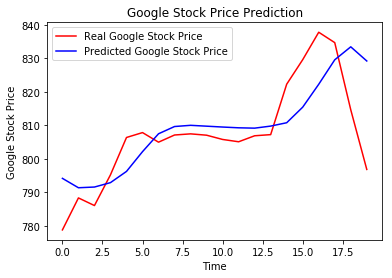

In [6]:
# Visualization
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
